In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akifk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\akifk\Trimester 5\Data Science Research Project A\Data\posts_combined.csv')

In [4]:
# Printing df
df
# Number of rows and columns
print(df.shape)

(22523, 9)


In [5]:
# Drop rows with any NaN values
df = df.dropna()
print("\nDataFrame after dropping rows with NaN values:")
print(df)


DataFrame after dropping rows with NaN values:
       post_id                                            content  \
0      1moiuol  How to start being sober As anyone got any tip...   
1      1moirh9  My vet is an Egyptian goddess in human form. H...   
2      1moi0e0  I did it!! A small win Now by no means am I "s...   
3      1mohf3r  Have to Detox Off My Prescribed Xanax in Order...   
4      1moh88r  A carton of cigarettes a week My mother smokes...   
...        ...                                                ...   
22518  1m2uppq  Self Love has replaced self respect,  and we'r...   
22519  1m2upcj  Live song versions suck Maybe I’m a purist but...   
22520  1m2th7g  Cold vegetables do not belong on burgers. I kn...   
22521  1m2tb9c  Burgers are way better lettuce wrapped without...   
22522  1m2swxp  Carbonation in drinks is too common and it’s u...   

                     author                       date          category  \
0      Adventurous-Pin-1786  2025-08-12T19:45:4

In [6]:
# Convert columns to appropriate data types
df['date'] = pd.to_datetime(df['date'])
df['num_comments'] = pd.to_numeric(df['num_comments'], errors='coerce')
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['upvote_ratio'] = pd.to_numeric(df['upvote_ratio'], errors='coerce')

In [7]:
# Basic statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
       num_comments         score  upvote_ratio
count  22001.000000  22001.000000  22001.000000
mean      17.593382     38.842916      0.859155
std       83.643817    326.015801      0.197024
min        0.000000      0.000000      0.060000
25%        1.000000      1.000000      0.770000
50%        4.000000      3.000000      0.970000
75%       11.000000     10.000000      1.000000
max     2908.000000  15677.000000      1.000000


In [8]:
# Missing data
print("\nMissing Data:")
print(df.isnull().sum())


Missing Data:
post_id         0
content         0
author          0
date            0
category        0
num_comments    0
score           0
upvote_ratio    0
url             0
dtype: int64


In [9]:
# Post lengths
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['content'].apply(lambda x: len(str(x)))

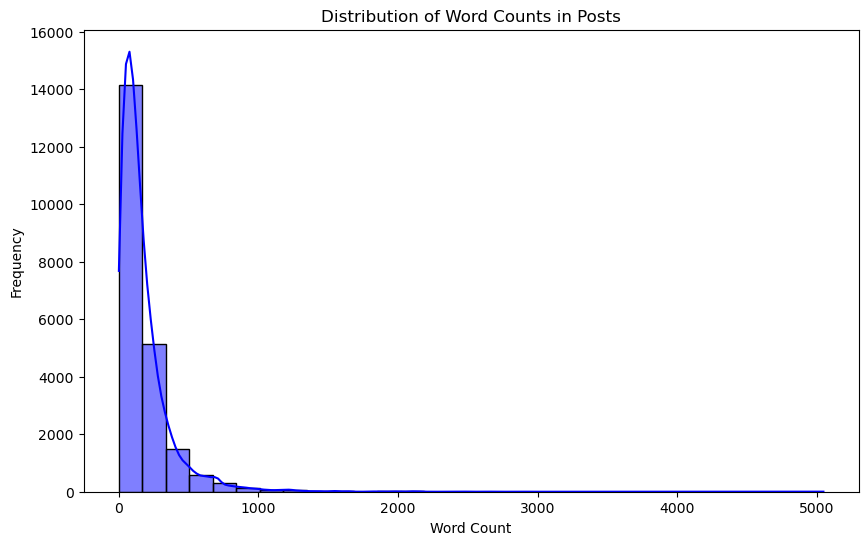

In [10]:
# Plot distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Counts in Posts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Most common words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['content'].apply(lambda x: [word.lower() for word in str(x).split() if word.lower() not in stop_words])

In [12]:
# Flatten the list of tokens
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = pd.Series(all_words).value_counts().head(20)

In [13]:
word_freq

like         24780
i’m          16648
feel         15750
know         12868
get          12580
even         10787
want         10049
would         9645
people        9546
really        9128
one           8219
don’t         8121
it’s          7975
time          7775
think         7124
i’ve          6719
also          6547
something     6498
go            6304
never         6113
Name: count, dtype: int64

C:\Users\akifk\AppData\Local\Temp\ipykernel_12772\1832260136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')


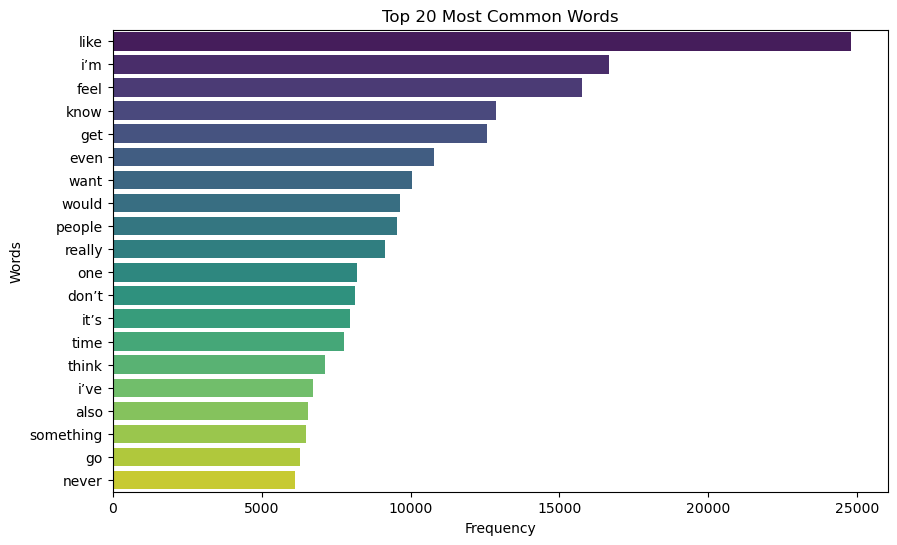

In [14]:
# Bar chart of most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

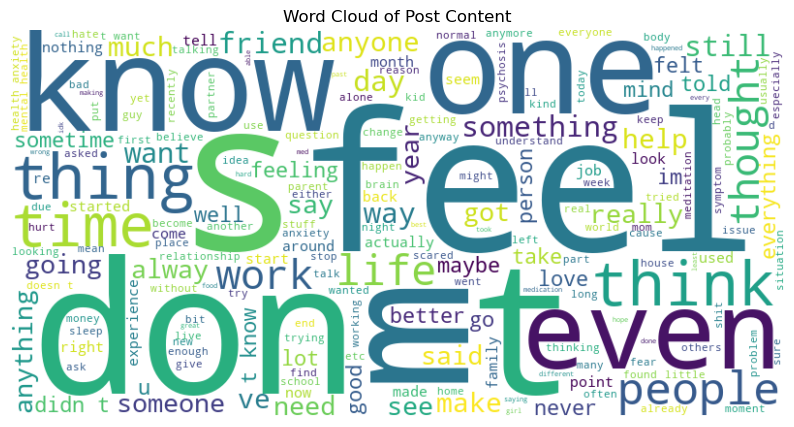

In [15]:
# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Content')
plt.show()

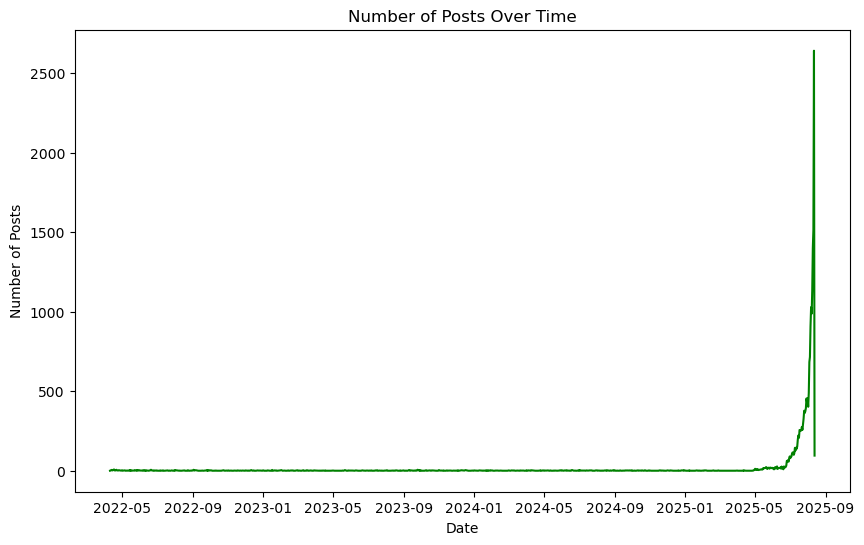

In [16]:
# Time trends
df['date_only'] = df['date'].dt.date
posts_per_day = df.groupby('date_only').size()

plt.figure(figsize=(10, 6))
posts_per_day.plot(kind='line', color='green')
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

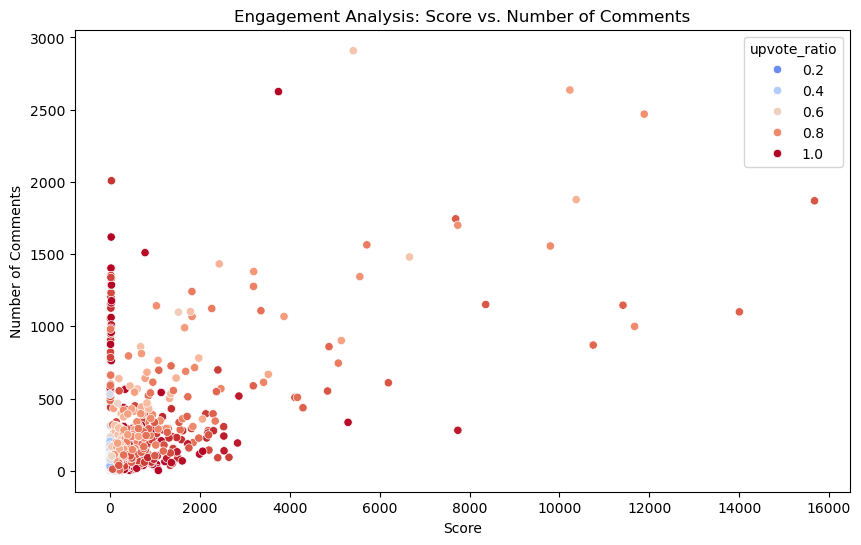

In [17]:
# Engagement analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='score', y='num_comments', hue='upvote_ratio', palette='coolwarm')
plt.title('Engagement Analysis: Score vs. Number of Comments')
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.show()

In [18]:
all_words

['start',
 'sober',
 'anyone',
 'got',
 'tips',
 'take',
 'first',
 'steps',
 'sobriety.',
 'i’ve',
 'smashing',
 'party',
 'drugs',
 'mdma',
 'ket',
 'cocaine',
 '3',
 'years',
 'gradually',
 'times',
 'gone',
 'feels',
 'like',
 'every',
 'weekend',
 'can’t',
 'go',
 'without',
 'buying',
 'drugs.',
 'recently',
 'noticed',
 'week',
 'i’m',
 'constantly',
 'low',
 'mood',
 'nose',
 'started',
 'bleeding',
 'heavy',
 'every',
 'time',
 'start',
 'sniff',
 'feel',
 'like',
 'don’t',
 'stop',
 'i’m',
 'gonna',
 'irreversible',
 'damage',
 '20',
 'don’t',
 'want',
 'happen',
 '.',
 'don’t',
 'many',
 'friends',
 'talk',
 'week',
 'time',
 'see',
 'people',
 'go',
 'rave/bar',
 'etc',
 'makes',
 'harder',
 'stop',
 'drugs',
 'soon',
 'go',
 'it’s',
 'think',
 '.',
 'vet',
 'egyptian',
 'goddess',
 'human',
 'form.',
 'know',
 'she’s',
 'entirely',
 'human?',
 'well…',
 'take',
 'look',
 'pic',
 'drew',
 'dream—attached',
 'reference.',
 'conjure',
 'dreams',
 'sleep,',
 'slipping',
 'subc

# Feature Extraction of Depressive symptoms (uddin et al)

In [19]:
depressive_keywords = [
    # core depressive words
    "abandon", "abysm", "abyss", "agony", "alone", "anguish", "annoyance", "annul",
    "banal", "bankruptcy", "bareness", "bereaved", "bereavement", "bereft",
    "black-bile", "bleakness", "blue", "blue-devils", "blueness", "blues",
    "boredom", "boringness", "bother", "brokenheartedness", "capitulation",
    "castrate", "cave", "chasm", "cold-shoulder", "come-down", "commiseration",
    "compassion", "condole-with", "crack", "crater", "crevice", "cut", "cut-back",
    "dark", "darkest", "decay", "decline", "decrease", "degenerate", "dejectedness",
    "dejection", "departure", "depletion", "deplorable", "depression",
    "deprivation", "descend", "descent", "desolation", "despair", "desperation",
    "despicable", "despondence", "despondency", "deteriorate", "devastation",
    "discharge", "disconnect", "disconsolate", "discouragement", "disheartenment",
    "dismal", "dismalness", "dismay", "dismiss", "dispiritedness",
    "distress", "distressing", "ditch", "doldrums", "dolefulness", "dolor",
    "downfall", "downheartedness", "downsizing", "downturn", "drear", "dreariness",
    "dreary", "drop", "dump", "dumps", "emptiness", "empty", "ennui", "error",
    "excruciation", "exhaust", "expiration", "failure", "fall", "fatigue",
    "forlornness", "gash", "graveness", "gravity", "grief", "grief-stricken",
    "grieve", "grim", "gloom", "gloominess", "gloomy", "glumness", "gutter",
    "hang", "heartache", "heartbreak", "heartsickness", "hell", "hole", "hollow",
    "hopeless", "hurt", "hurting", "ignore", "inanity", "lamentable", "lamentation",
    "leave-out", "lessen", "lone", "loneliness", "lonely", "lonesome", "loser",
    "loss", "low-spiritedness", "lowness", "lugubriousness", "melancholia",
    "melancholic", "melancholy", "miserableness", "misery", "mistake", "moodiness",
    "mope", "morbidness", "moroseness", "mourn", "mournfulness", "mourning",
    "nihility", "nothingness", "nonstarter", "neglect", "null", "nullify",
    "oppression", "oppressiveness", "pain", "painful-sensation", "painfulness",
    "pathetic", "perdition", "pity", "pitfall", "pointlessness", "regret",
    "reject", "repent", "rue", "ruefulness", "run-down", "sad", "sadness", "scar",
    "self-despair", "shame", "shit", "shopworn", "shorten", "sink", "slump",
    "sorrow", "sorrowfulness", "sorrowing", "sorry", "sullenness", "sulkiness",
    "suffering", "tearful", "tediousness", "tedium", "tire", "tired", "torment",
    "torture", "trouble", "ugly", "undermine", "unhappiness", "unworthy",
    "vacancy", "vacuity", "void", "wane", "weakness", "wear", "weary",
    "woe", "woefulness", "worsen", "worthless", "wretched", "wretchedness",

    # fundamental negative / disease words
    "socialanxiety", "healthanxiety", "bipolar", "bpd", "schizophrenia",
    "paranoia", "alcoholism", "addiction", "adhd", "psychosis",
    "mentalillness", "stress", "therapy", "loner", "divorce",
    "foreveralone", "aspergers", "autism", "autismparents",
    "stopdrinking", "support", "offmychest", "trueoffmychest",
    "confession", "wellthatsucks",

    # extra emotional negatives
    "guilt", "guilty", "worthlessness", "hopelessness", "helplessness",
    "self", "loathing", "hatred", "blame", "inadequate", "insecurity",
    "resentment", "remorse", "inferior", "inferiority", "useless",
    "powerless", "ashamed", "shamed", "disgust", "reproach",

    # decomposed from multiword expressions
    "worthless", "piece", "of", "shit",
    "garbage", "good", "for", "nothing",

    # NEW merged words from  Md Zia Uddin1 •KimKristoffer Dysthe2 • Asbjørn Følstad1 • Petter Bae Brandtzaeg1,2
    # 'Deep learning for prediction of depressive symptoms in a large textual dataset'
    "always", "bar", "become", "below", "believe", "bottom", "burd",
    "burnt out", "can", "clear", "closed", "cloud", "concentration",
    "concentrate", "constant", "cruel", "damn", "darkest", "demotives",
    "difficult", "distances", "energy", "energy level", "enough",
    "equal", "forts", "friend", "funny", "given", "gone", "horror",
    "I", "ill", "impatience", "in", "indr", "ing", "initiative",
    "insane", "insignificant", "interests", "live", "lock", "long",
    "low", "me", "mental", "miss", "more", "motivation", "my",
    "nervous", "nothing", "on", "out", "own", "person", "place",
    "push", "quit", "rich", "slept", "social", "so", "someone",
    "something", "suisid", "suicid", "suicidal idea", "surplus",
    "tank", "tap", "taste", "tear", "than", "think", "time", "toil",
    "trust", "unused", "unconcentrated", "unmotivated", "unrest",
    "unsocial", "well", "wild"
]

len(depressive_keywords)

352

In [20]:
def tag_category(text):
    if any(word in text.lower() for word in depressive_keywords):
        return 'depressive'
    else:
        return 'non-depressive'

df['label'] = df['content'].apply(tag_category)

In [21]:
df['label'].describe()

count          22001
unique             2
top       depressive
freq           21842
Name: label, dtype: object

<Axes: xlabel='label'>

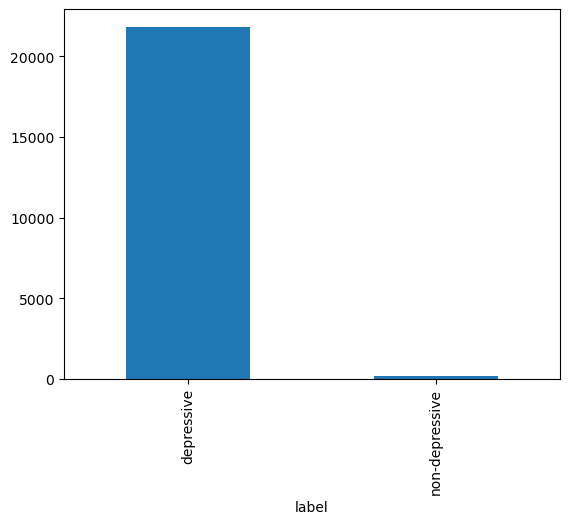

In [22]:
df['label'].value_counts().plot(kind='bar')

In [23]:
df.describe

<bound method NDFrame.describe of        post_id                                            content  \
0      1moiuol  How to start being sober As anyone got any tip...   
1      1moirh9  My vet is an Egyptian goddess in human form. H...   
2      1moi0e0  I did it!! A small win Now by no means am I "s...   
3      1mohf3r  Have to Detox Off My Prescribed Xanax in Order...   
4      1moh88r  A carton of cigarettes a week My mother smokes...   
...        ...                                                ...   
22518  1m2uppq  Self Love has replaced self respect,  and we'r...   
22519  1m2upcj  Live song versions suck Maybe I’m a purist but...   
22520  1m2th7g  Cold vegetables do not belong on burgers. I kn...   
22521  1m2tb9c  Burgers are way better lettuce wrapped without...   
22522  1m2swxp  Carbonation in drinks is too common and it’s u...   

                     author                      date          category  \
0      Adventurous-Pin-1786 2025-08-12 19:45:44+00:00         

# Random Forest for classificaiton

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [25]:
# Assuming df is already loaded
X_text = df["content"]   # text feature
y = df["label"]          # target labels

In [26]:
vectorizer = TfidfVectorizer(max_df = 0.5, max_features=50000, stop_words="english")
X_text_vec = vectorizer.fit_transform(X_text)

In [27]:
import scipy.sparse as sp

X_numeric = df[["word_count", "char_count"]].values
# Combine text features with numeric
X_combined = sp.hstack([X_text_vec, X_numeric])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=None, 
    random_state=42, 
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [30]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.993410588502613
                precision    recall  f1-score   support

    depressive       0.99      1.00      1.00      4369
non-depressive       0.80      0.12      0.22        32

      accuracy                           0.99      4401
     macro avg       0.90      0.56      0.61      4401
  weighted avg       0.99      0.99      0.99      4401



In [31]:
comments_df = pd.read_csv(r"C:\Users\akifk\Trimester 5\Data Science Research Project A\Data\comments_combined.csv")  # adjust file name if needed
print(comments_df.head())

  comment_id  post_id                                            content  \
0    n8cf1vt  1moiuol  Don’t forget to check out our [**Resources**](...   
1    n8cecex  1moirh9  Don’t forget to check out our [**Resources**](...   
2    n8c8fz9  1moi0e0  Don’t forget to check out our [**Resources**](...   
3    n8c3tin  1mohf3r  Don’t forget to check out our [**Resources**](...   
4    n8c871b  1mohf3r  Do you really want to quit Xanax or are you pl...   

          author                       date  order  score   parent_id  \
0  AutoModerator  2025-08-12T19:45:45+00:00      1      1  t3_1moiuol   
1  AutoModerator  2025-08-12T19:42:23+00:00      1      1  t3_1moirh9   
2  AutoModerator  2025-08-12T19:14:31+00:00      1      1  t3_1moi0e0   
3  AutoModerator  2025-08-12T18:52:49+00:00      1      1  t3_1mohf3r   
4    nlonghitano  2025-08-12T19:13:20+00:00      2      1  t3_1mohf3r   

      link_id                                          permalink  
0  t3_1moiuol  /r/addiction/comments/

In [32]:
# Prep the text (assuming comments column is called "comment")
X_new_text = comments_df["content"].fillna("")

# Convert to vectors using the SAME vectorizer from training
X_new_vec = vectorizer.transform(X_new_text)

In [33]:
# Probability scores per class
probs = rf.predict_proba(X_new_vec)

# Predicted class index
preds = rf.predict(X_new_vec)

# Convert back to original string labels
pred_labels = le.inverse_transform(preds)

# Combine into results DataFrame
results = pd.DataFrame(probs, columns=[f"score_{cls}" for cls in le.classes_])
results["predicted_label"] = pred_labels
results["text"] = X_new_text

ValueError: X has 49452 features, but RandomForestClassifier is expecting 49454 features as input.

In [ ]:
print(results.head())